In [2]:
%%html
<link rel="stylesheet" href="static/hyrule.css" type="text/css">

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/alexlove/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
count,83.000000,61.000000,32.000000,83.000000,56.000000,83.000000
mean,10.433735,1.875410,0.439583,13.567470,0.281581,166.136349
std,4.450357,1.298288,0.358680,4.452085,0.976414,786.839732
min,1.900000,0.100000,0.116667,4.100000,0.000140,0.005000
25%,7.850000,NaN,NaN,10.250000,NaN,0.174000
50%,10.100000,NaN,NaN,13.900000,NaN,1.670000
75%,13.750000,NaN,NaN,16.150000,NaN,41.750000
max,19.900000,6.600000,1.500000,22.100000,5.712000,6654.000000


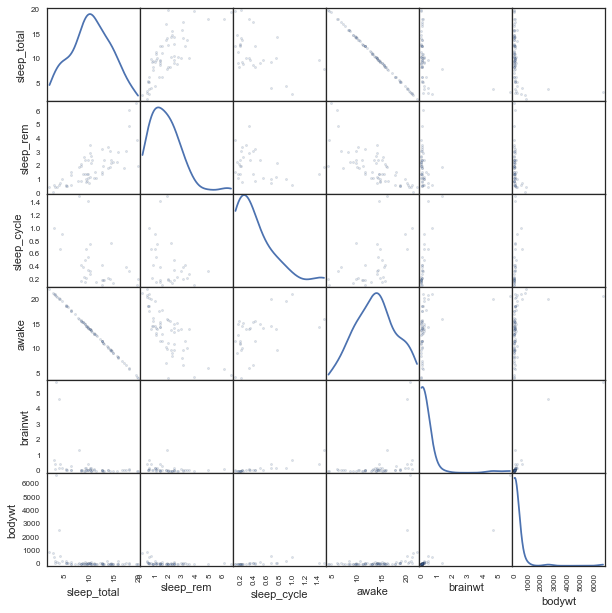

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('white')
spat = pd.read_csv('../data/msleep.csv')

pd.scatter_matrix(spat, figsize=[10, 10], alpha=0.2, diagonal='kde')
spat.describe()

Figure(800x800)


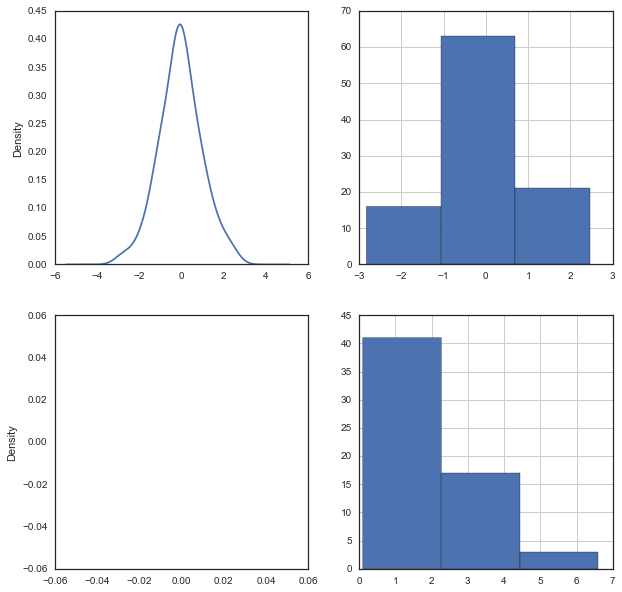

In [21]:
norm = pd.DataFrame({'d': np.random.normal(size=100)})
#max - min for every column
n_bins = int(np.abs(spat['sleep_rem'].max() - spat['sleep_rem'].min()))
#print n_bins
fig, axes = plt.subplots(nrows=2, ncols=2)

## New notation: what does the 'ax' argument do?
norm['d'].plot(ax=axes[0, 0], kind='kde')
norm['d'].hist(ax=axes[0, 1], bins=n_bins/2)
spat['sleep_rem'].plot(ax=axes[1, 0], kind='kde')
spat['sleep_rem'].hist(ax=axes[1, 1], bins=n_bins/2)

print fig

#try to change plot params to make graph cover more ground
# figsize = (10,10) add to .plot or .subplots

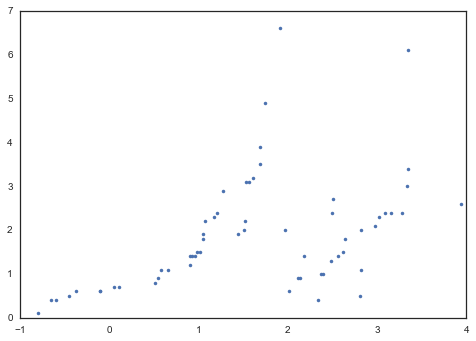

In [14]:
qq = sorted(np.random.normal(spat['sleep_rem'].mean(), spat['sleep_rem'].std(), len(spat)))

sleep_rem = sorted(spat['sleep_rem'])

plt.plot(qq, sleep_rem, '.')
plt.show()

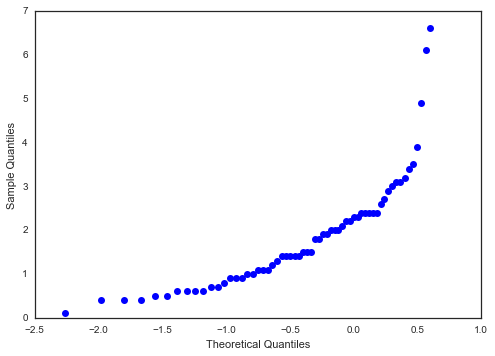

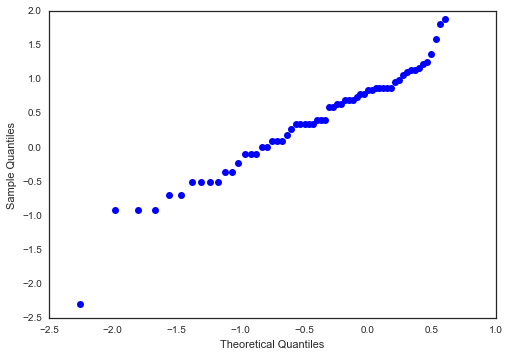

In [9]:
import statsmodels.api as sm
import scipy.stats as stats

# Check sm.qqplot() configurations with shift+tab to see how you can change the distribution you are testing against!
fig = sm.qqplot(spat['sleep_rem'], dist=stats.distributions.norm, line='s')
plt.show()

fig = sm.qqplot(np.log(spat['sleep_rem']), dist=stats.distributions.norm, line='s')
plt.show()

NORMAL FIT SUMMARY
                            OLS Regression Results                            
Dep. Variable:              sleep_rem   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2.370
Date:                Mon, 10 Oct 2016   Prob (F-statistic):              0.131
Time:                        18:23:48   Log-Likelihood:                -74.520
No. Observations:                  48   AIC:                             153.0
Df Residuals:                      46   BIC:                             156.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.0382      0.186 

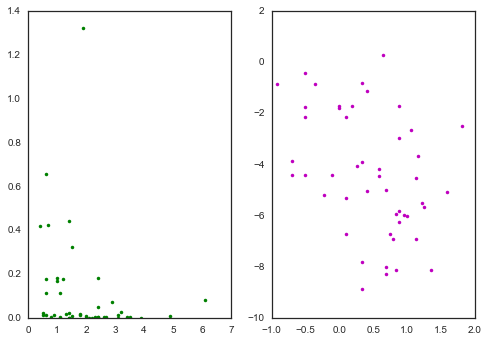

In [16]:
import statsmodels.formula.api as smf
# OLS, or ordinary least squares, takes a y (dependent variable) and X (independent variables) (formula = y ~ X)
# Below, we copy the data frame and remove the na variables, and create a single variable linear model
# to return a test statistic and p-value, to see how strong of a relationship bodyweight and brainweight have.

spat_cleaned_up = pd.DataFrame(spat)
spat_cleaned_up['sleep_rem'].dropna(inplace=True)
spat_cleaned_up['brainwt'].dropna(inplace=True)
spat_cleaned_up['log_sleep_rem'] = np.log(spat_cleaned_up['sleep_rem'])
spat_cleaned_up['log_brainwt'] = np.log(spat_cleaned_up['brainwt'])

fig, axes = plt.subplots(nrows=1,ncols=2)

axes[0].plot(spat_cleaned_up.sleep_rem, spat_cleaned_up.brainwt, 'g.')

model = smf.ols(formula='sleep_rem ~ brainwt', data=spat_cleaned_up)
results = model.fit()
print 'NORMAL FIT SUMMARY'
print(results.summary())
print

axes[1].plot(spat_cleaned_up.log_sleep_rem, spat_cleaned_up.log_brainwt, 'm.')

log_model = smf.ols(formula='log_sleep_rem ~ log_brainwt', data=spat_cleaned_up)
log_results = log_model.fit()
print 'LOG-LOG FIT SUMMARY'
print(log_results.summary())

print fig